# 境界値問題 (線形常微分方程式の場合)

* Author: 黒木玄
* Date: 2019-04-15
* Repository: https://github.com/genkuroki/DifferentialEquations
$
\newcommand\Z{{\mathbb Z}}
\newcommand\R{{\mathbb R}}
\newcommand\C{{\mathbb C}}
\newcommand\eps{\varepsilon}
\newcommand\QED{\text{□}}
$

このファイルは [nbviewer](https://nbviewer.jupyter.org/github/genkuroki/DifferentialEquations/blob/master/02-1%20Boundary%20value%20problems%20(linear%20ODE%20case).ipynb) でも閲覧できる.

[Julia言語](https://julialang.org/) と [Jupyter環境](https://jupyter.org/) の簡単な解説については次を参照せよ:

* [JuliaとJupyterのすすめ](https://nbviewer.jupyter.org/github/genkuroki/msfd28/blob/master/msfd28genkuroki.ipynb?flush_cached=true)

[Julia言語](https://julialang.org/) 環境の整備の仕方については次を参照せよ:

* [Julia v1.1.0 の Windows 8.1 へのインストール](https://nbviewer.jupyter.org/github/genkuroki/msfd28/blob/master/install.ipynb)

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#微分方程式の分類" data-toc-modified-id="微分方程式の分類-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>微分方程式の分類</a></span></li><li><span><a href="#初期条件や境界条件" data-toc-modified-id="初期条件や境界条件-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>初期条件や境界条件</a></span><ul class="toc-item"><li><span><a href="#調和振動子" data-toc-modified-id="調和振動子-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>調和振動子</a></span></li><li><span><a href="#調和振動子の初期値問題" data-toc-modified-id="調和振動子の初期値問題-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>調和振動子の初期値問題</a></span></li><li><span><a href="#調和振動子のDirichlet型境界値問題" data-toc-modified-id="調和振動子のDirichlet型境界値問題-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>調和振動子のDirichlet型境界値問題</a></span></li><li><span><a href="#調和振動子のNeumann型境界値問題" data-toc-modified-id="調和振動子のNeumann型境界値問題-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>調和振動子のNeumann型境界値問題</a></span></li></ul></li><li><span><a href="#BVProblemの使い方" data-toc-modified-id="BVProblemの使い方-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>BVProblemの使い方</a></span><ul class="toc-item"><li><span><a href="#境界条件1" data-toc-modified-id="境界条件1-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>境界条件1</a></span></li><li><span><a href="#境界条件1-(別の方法)" data-toc-modified-id="境界条件1-(別の方法)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>境界条件1 (別の方法)</a></span></li><li><span><a href="#境界条件2" data-toc-modified-id="境界条件2-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>境界条件2</a></span></li></ul></li><li><span><a href="#調和振動子の数値解" data-toc-modified-id="調和振動子の数値解-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>調和振動子の数値解</a></span><ul class="toc-item"><li><span><a href="#初期値問題" data-toc-modified-id="初期値問題-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>初期値問題</a></span></li><li><span><a href="#斉次Dirichlet境界条件" data-toc-modified-id="斉次Dirichlet境界条件-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>斉次Dirichlet境界条件</a></span></li><li><span><a href="#斉次Neumann境界条件" data-toc-modified-id="斉次Neumann境界条件-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>斉次Neumann境界条件</a></span></li><li><span><a href="#非斉次Dirichlet境界条件" data-toc-modified-id="非斉次Dirichlet境界条件-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>非斉次Dirichlet境界条件</a></span></li><li><span><a href="#非斉次Neumann境界条件" data-toc-modified-id="非斉次Neumann境界条件-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>非斉次Neumann境界条件</a></span></li></ul></li></ul></div>

In [1]:
using DifferentialEquations
using Plots
default(:bglegend, plot_color(default(:bg), 0.7))
default(:fglegend, plot_color(ifelse(isdark(plot_color(default(:bg))), :white, :black), 0.2))

gr()
ENV["PLOTS_TEST"] = "true";

## 微分方程式の分類

偏微分が出て来ない微分方程式を **常微分方程式 (ordinary differential equation)** と呼ぶ.

**例.** 調和振動子: $\omega > 0$ に対する微分方程式

$$
\ddot u = -\omega^2 u
$$

は常微分方程式である. $\QED$

**例.** 単振子: $\omega^2$ に対する微分方程式

$$
\ddot u = -\omega^2\sin u
$$

も常微分方程式である. $\QED$

偏微分が出て来る微分方程式を **偏微分方程式 (partial differential equation)** と呼ぶ.

**例.** 熱方程式: 偏微分方程式

$$
u_t = u_{xx}
$$

を空間次元1次元の **熱方程式 (heat equation)** と呼ぶ. $\QED$

**例.** 熱方程式: $c>0$ に対して, 偏微分方程式

$$
\frac{1}{c^2}u_{tt} = u_{xx}
$$

を空間次元1次元の **波動方程式 (heat equation)** と呼ぶ. $\QED$

**例.** Korteweg--de Vries 方程式: 偏微分方程式

$$
u_t + u_{xxx} + 6uu_x = 0 
$$

を **KdV方程式** と呼ぶ. $\QED$

さらに, 微分方程式には線形と非線形の区別もあって, 調和振動子と熱方程式や波動方程式は線形であり, 単振子やKdV方程式は非線形の微分方程式である.

一般に unknown function $u$ に関する線形作用素 $P$ によって $Pu=0$ と書ける微分方程式は **線形微分方程式 (linear differential equation)** もしくは **斉次線形微分方程式 (せいじ, homogeneous linear differential equation)** と呼ぶ.  さらに与えられた函数 $f$ のデータが追加されて, $Pu=f$ と書ける微分方程式を **非斉次線形微分方程式 (ひせいじ, inhomogeneous differential equation)** と呼ぶ

例えば, $P=(d/dt)^2+\omega^2$ のとき, $Pu = \ddot u + \omega^2 u$ なので, $Pu=0$ は調和振動子の微分方程式になる. 調和振動子の微分方程式は斉次線形常微分方程式である.

例えば, $P=(\frac{1}{c}\partial/\partial t)^2 - (\partial/\partial x)^2$ のとき $Pu = c^{-2} u_{tt} - u_{xx}$ なので $Pu=0$ は波動方程式になる. 波動方程式は斉次線形偏微分方程式である.

非斉次な線形微分方程式の典型例は外部から強制力が与えられている場合に得られる微分方程式である. 調和振動子にが与えられているとき, 微分方程式は

$$
\ddot u = -\omega^2 u + f(t)
$$

の形になる. $f(t)$ が外力を表す. この微分方程式は $P=(d/dt)^2+\omega^2$ とおくとき, $Pu=f$ と書ける. 外力が与えられた調和振動子は非斉次な線形常微分方程式である.

微分方程式が時間発展を意味するとき, 微分方程式中に時間変数 $t$ が明示的に含まれているとき, その微分方程式は **非自励的 (non-autonomous)** と呼ばれる.  微分方程式中に時間変数 $t$ が明示的に含まれないとき, その微分方程式は **自励的 (autonomous)** であるという.  自励的な微分方程式で記述される系は **自励系 (autonomous system)** と呼ばれ, 非自励的な微分方程式で記述される系は **非自励系 (non-autonomous system)** と呼ばれる.

**例.** Painlevé I and II: 非自励的な常微分方程式

$$
\frac{du^2}{dt^2} = 6y^2 + t
$$

は **Painlevé I 方程式 (the first Painlevé equation)** と呼ばれ, 
非自励的な常微分方程式

$$
\frac{du^2}{dt^2} = 2y^3 + ty + \alpha
$$

は **Painlevé II 方程式 (the second Painlevé equation)** と呼ばる. 他にも Painlevé III～VI 方程式があり, どれも2階の非自励的非線形常微分方程式である. $\QED$

微分方程式の階数は微分方程式が含む最高次の導函数の階数のことである.

**例.** 楕円函数の満たす微分方程式: 

$$
\left(\frac{dy}{dt}\right)^2 = 4y^3 + 2ay + b
$$

の形の自励的な非線形常微分方程式の解は **楕円函数** と呼ばれるクラスの函数になることが知られている.  この微分方程式の解として楕円函数を定義することもできる.  この微分方程式の両辺を微分すると次の微分方程式が得られる:

$$
2\frac{dy}{dt}\frac{dy^2}{dt^2} = 12 y^2\frac{dy}{dt} + 2a\frac{dy}{dt}.
$$

両辺を $2dy/dt$ で割ると

$$
\frac{dy^2}{dt^2} = 6y^2 + a.
$$

上の Painlevé I 方程式はこの楕円函数が満たす微分方程式における定数 $a$ を時間変数 $t$ に置き換えた形をしている. $\QED$

**おまけ:** 次のノートブックでは熱方程式, KdV方程式, Schrödinger方程式, Smith方程式を数値的に解いている:

* [FFTを用いた偏微分方程式の数値解法(in-place版)](https://nbviewer.jupyter.org/github/genkuroki/DifferentialEquations/blob/master/A01%20Solving%20heat%2C%20KdV%2C%20Schroedinger%2C%20and%20Smith%20eqations%20by%20in-place%20FFT.ipynb)

非常に沢山の微分方程式があって, 数値的に解くための様々な方法が存在する.  それらをマスターするには自分で試行錯誤してみるのが一番早い.  他人の話を聴くのではなく, 自分でやってみることが重要である.

## 初期条件や境界条件

微分方程式を解くときには, 与えられた微分方程式を満たすすべての解を求めるのではなく, 目的に応じて適切な条件を満たす解を求めることが多い.

「目的に応じた適切な条件」として現われる条件の典型例が **初期条件** や **境界条件** である.

それらについて例を用いて説明したい.

### 調和振動子

$\omega>0$ であると仮定する. 次の微分方程式を調和振動子の微分方程式と呼ぶ:

$$
\ddot x = -\omega^2 x.
$$

この微分方程式の任意の解は定数 $A$, $B$ によって次のように表わされる:

$$
x(t) = A\cos\omega t + B\sin\omega t.
$$

この式の右辺が調和振動子の微分方程式の解になっていることは時間変数 $t$ で2回微分してみればすぐにわかる.  任意の解がこのように表わされることは2階の線形常微分方程式の解空間(解全体のなすベクトル空間)が2次元になるという事実からわかる.

### 調和振動子の初期値問題

任意に与えられた定数 $a,b$ に対して, 調和振動子 $\ddot x = -\omega^2 x$ の解で初期条件

$$
x(0) = a, \quad \dot x(0) = b\omega
$$

を満たすものが唯一つ存在することを示そう.  この初期条件に一般解

$$
x(t) = A\cos\omega t + B\sin\omega t
$$

を代入することによって, 

$$
A = a, B = b
$$

を得る. これで

$$
x(t) = a\cos\omega t + b\sin\omega t
$$

が上の初期条件を満たす唯一つの解になる.

### 調和振動子のDirichlet型境界値問題

$T>0$ と与えられた定数 $a,b$ に対して, 調和振動子 $\ddot x=-\omega^2 x$ の解で境界条件

$$
x(0) = a, \quad x(T) = b
$$

を満たすものをすべて求めてみよう.  これに一般解 $x(t) = A\cos\omega t + B\sin\omega t$ を代入すると

$$
A = a, \quad A\cos\omega T + B\sin\omega T = b.
$$

$A$ は $A=a$ によって一意的に決まるが, $B$ については $\sin\omega T$ が $0$ であるか否かによって場合分けが必要になる.

$\sin\omega T\ne 0$ の場合. そのとき, 任意の $a,b$ の組み合わせに対して, $A,B$ が次のように一意的に決まる:

$$
A = a, \quad B = \frac{b - a\cos\omega T}{\sin\omega T}.
$$

すなわち,

$$
x(t) = a\cos\omega t + \frac{b - a\cos\omega T}{\sin\omega T}\sin\omega t
$$

が上の境界条件を満たす調和振動子の微分方程式の唯一つの解になる.

$\sin\omega T = 0$ の場合. そのとき $\omega T = m\pi$, $m\in \Z_{>0}$ と書け, $\cos\omega T = (-1)^m$ となる. 上の境界条件を満たす解が存在するための必要十分条件は

$$
b=(-1)^m a
$$

となる.  そのとき, 

$$
x(t)=a\cos\omega t + B\sin\omega t = x(0)\cos\omega t + B\sin\omega t
$$

は上の境界条件を満たす調和振動子の微分方程式の解になる($B$ はなんでもよい).

### 調和振動子のNeumann型境界値問題

$T>0$ と与えられた定数 $a,b$ に対して, 調和振動子 $\ddot x=-\omega^2 x$ の解で境界条件

$$
\dot x(0) = a\omega, \quad \dot x(T) = b\omega
$$

を満たすものをすべて求めてみよう.  これに一般解 $x(t) = A\cos\omega t + B\sin\omega t$ から得られる

$$
\dot x(t) = \omega(-A\sin\omega t + B\cos\omega t)
$$

を代入すると

$$
B = a, \quad -A\sin\omega T + B\cos\omega T = b.
$$

$B$ は $B=a$ によって一意的に決まるが, $A$ については $\sin\omega T$ が $0$ であるか否かによって場合分けが必要になる.

$\sin\omega T\ne 0$ の場合. そのとき, 任意の $a,b$ の組み合わせに対して, $A,B$ が次のように一意的に決まる:

$$
B = a, \quad A = \frac{a\cos\omega T - b}{\sin\omega T}.
$$

すなわち,

$$
x(t) = \frac{a\cos\omega T - b}{\sin\omega T}\cos\omega t + a\sin\omega t
$$

が上の境界条件を満たす調和振動子の微分方程式の唯一つの解になる.

$\sin\omega T = 0$ の場合. そのとき $\omega T = m\pi$, $m\in \Z_{>0}$ と書け, $\cos\omega T = (-1)^m$ となる. 上の境界条件を満たす解が存在するための必要十分条件は

$$
b=(-1)^m a
$$

となる.  そのとき, 

$$
x(t)=A\cos\omega t + a\sin\omega t = A\cos\omega t + \dot{x}(0)\sin\omega t
$$

は上の境界条件を満たす調和振動子の微分方程式の解になる($A$ はなんでもよい).

## BVProblemの使い方

https://docs.juliadiffeq.org/latest/tutorials/bvp_example.html

単振子:
$$
\ddot\theta = -\frac{g}{\ell}\sin\theta.
$$

In [2]:
### θ = u[1]
### dθ/dt = u[2]

const g = 9.81
const ℓ = 1.0
tspan = (0.0,pi/2)
function simplependulum!(du,u,p,t)
    θ  = u[1]
    dθ = u[2]
    du[1] = dθ
    du[2] = -(g/ℓ)*sin(θ)
end

simplependulum! (generic function with 1 method)

### 境界条件1

$[0,T]$ 上で

$$
\theta(T/2) = -\frac{\pi}{2}, \quad
\theta(0) = \frac{\pi}{2}.
$$

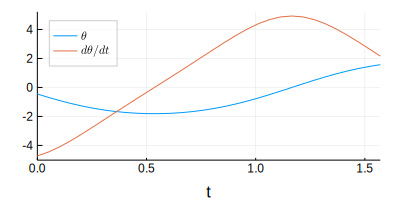

In [3]:
function bc1!(residual, u, p, t)
    residual[1] = u[end÷2][1] + pi/2 # the solution at the middle of the time span should be -pi/2
    residual[2] = u[end][1] - pi/2 # the solution at the end of the time span should be pi/2
end
bvp1 = BVProblem(simplependulum!, bc1!, [pi/2,pi/2], tspan)
sol1 = solve(bvp1, GeneralMIRK4(), dt=0.05)
plot(sol1, label=["\$\\theta\$", "\$d\\theta/dt\$"], lw=1, legend=:topleft, size=(400, 200))

### 境界条件1 (別の方法)

$[0,T]$ 上で

$$
\theta(T/2) = -\frac{\pi}{2}, \quad
\theta(0) = \frac{\pi}{2}.
$$

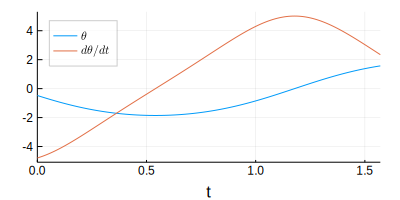

In [4]:
u₀_2 = [-1.6, -1.7] # the initial guess
function bc3!(residual, sol, p, t)
    residual[1] = sol(pi/4)[1] + pi/2 # use the interpolation here, since indexing will be wrong for adaptive methods
    residual[2] = sol(pi/2)[1] - pi/2
end
bvp3 = BVProblem(simplependulum!, bc3!, u₀_2, tspan)
sol3 = solve(bvp3, Shooting(Vern7()))
plot(sol3, label=["\$\\theta\$", "\$d\\theta/dt\$"], lw=1, legend=:topleft, size=(400, 200))

### 境界条件2

$[0,T]$ 上で

$$
\theta(0) = -\frac{\pi}{2}, \quad
\theta(T) = \frac{\pi}{2}.
$$

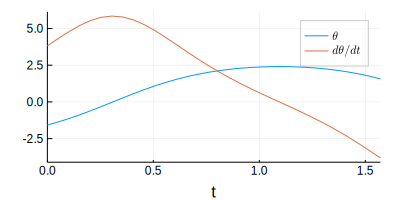

In [5]:
function bc2!(residual, u, p, t) # u[1] is the beginning of the time span, and u[end] is the ending
    residual[1] = u[1][1] + pi/2 # the solution at the beginning of the time span should be -pi/2
    residual[2] = u[end][1] - pi/2 # the solution at the end of the time span should be pi/2
end
bvp2 = TwoPointBVProblem(simplependulum!, bc2!, [pi/2,pi/2], tspan)
sol2 = solve(bvp2, MIRK4(), dt=0.05) # we need to use the MIRK4 solver for TwoPointBVProblem
plot(sol2, label=["\$\\theta\$", "\$d\\theta/dt\$"], lw=1, legend=:topright, size=(400, 200))

## 調和振動子の数値解

調和振動子

$$
\ddot x = -\omega^2 x.
$$

を数値的に解いてみよう.

In [6]:
function harmonicoscillator!(du, u, p, t)
    ω = p[1]
    du[1] = u[2]
    du[2] = - ω^2*u[1]
end

function plot_harmonicoscilator(; ω=5.0, a=0.0, b=1.0, T=2π)
    prob = ODEProblem(harmonicoscillator!, [a,b], (0,T), [ω])
    sol = solve(prob, dt=0.005)
    L = round(Int, 8π/T)
    kpiL(k) = isone(L) ? "\$$(k)\\pi\$" : "\$\\frac{$(k)\\pi}{$L}\$"
    xticks_num = 0:π/L:T
    xticks_str = [
        "\$0\$"
        "\$$(kpiL(""))\$"
        ["\$$(kpiL(k))\$" for k in 2:length(xticks_num)-1];
    ]
    P1 = plot(title="\$x(t):\\; \\omega = $ω\$", titlefontsize=12, legend=false)
    plot!(xticks = (xticks_num, xticks_str))
    plot!(sol, vars=(0,1), label="\$x\$", xlabel=" ", size=(400, 165), lw=1, color=:blue)
    P2 = plot(title="\$dx(t)/dt:\\; \\omega = $ω\$", titlefontsize=12, legend=false)
    plot!(xticks = (xticks_num, xticks_str))
    plot!(sol, vars=(0,2), label="\$dx/dt\$", xlabel=" ", size=(400, 160), lw=1, color=:red)
    plot(P1, P2, size=(700, 160))
end

plot_harmonicoscilator (generic function with 1 method)

### 初期値問題

$$
x(0) = a, \quad \dot x(0) = b.
$$

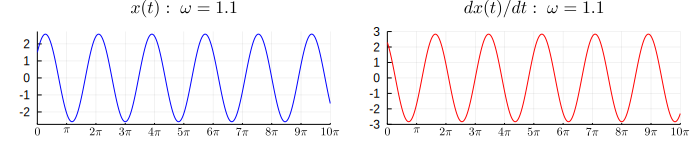

In [7]:
plot_harmonicoscilator(ω=1.1, a=1.5, b=2.3, T=10π)

### 斉次Dirichlet境界条件

$T = 2π$ とし,

$$
x(0) = x(T) = 0
$$

と区間 $[0,T]$ の両端で $0$ になる微分方程式

$$
\ddot x = -\omega^2 x
$$

の解を探してみる. $\omega = n/2$, $n=1,2,3,\ldots$ のとき, 

$$
x(t) = \sin\frac{nt}{2}
$$

は上の条件を満たす解になっている.

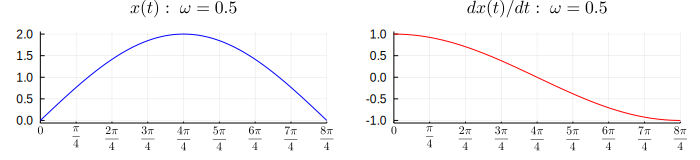

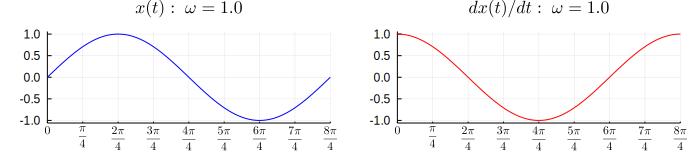

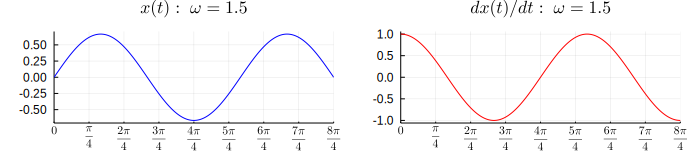

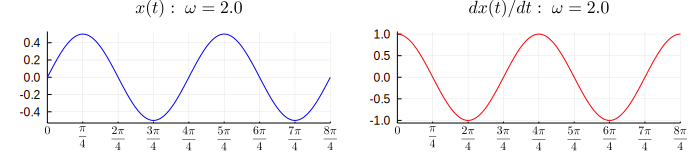

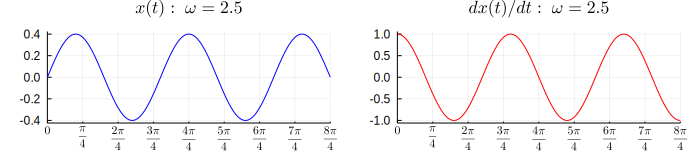

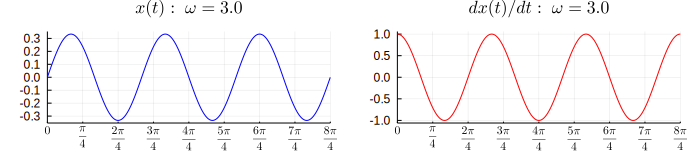

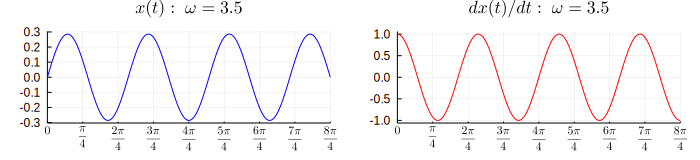

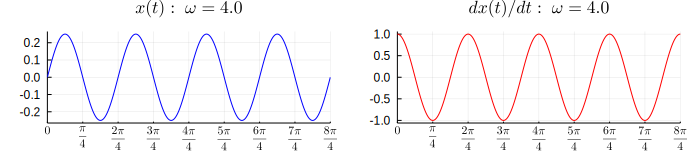

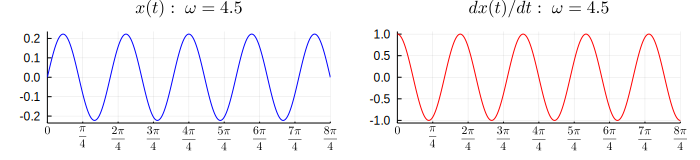

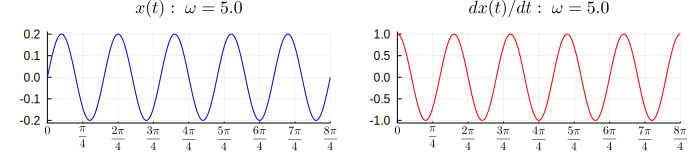

In [8]:
for k in 1:10
    plot_harmonicoscilator(; ω=0.5k, a=0.0, b=1.0, T=2π) |> display
end

### 斉次Neumann境界条件

$T = 2π$ とし,

$$
\dot x(0) = \dot x(T) = 0
$$

と区間 $[0,T]$ の両端で微分が $0$ になる微分方程式

$$
\ddot x = -\omega^2 x
$$

の解を探してみる. $\omega$ が $2$ 分の整数のとき

$$
x(t) = \cos(\omega t)
$$

は上の条件を満たす解になっている.

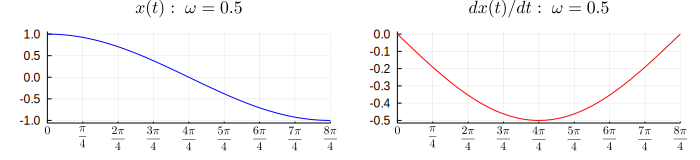

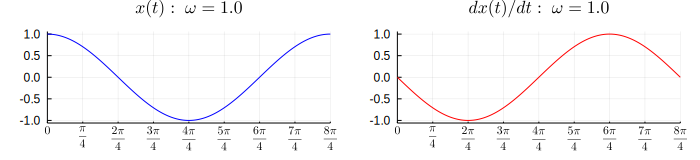

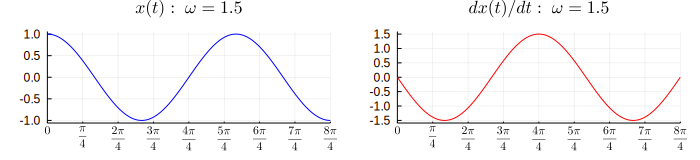

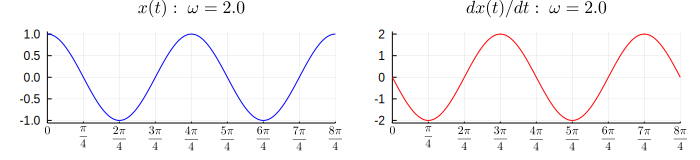

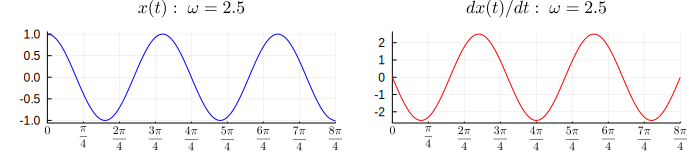

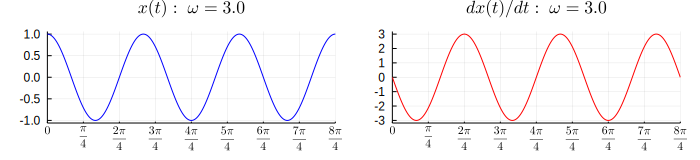

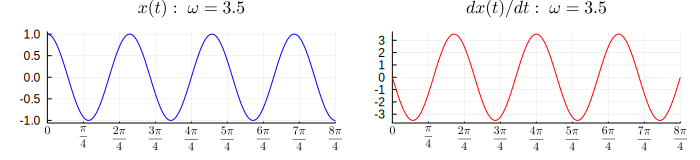

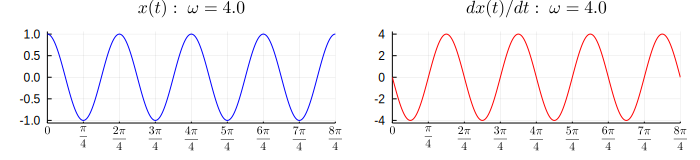

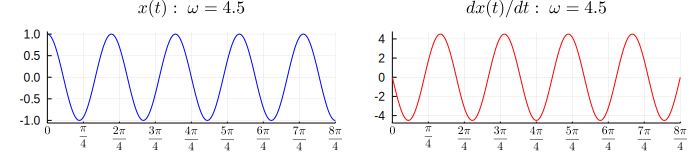

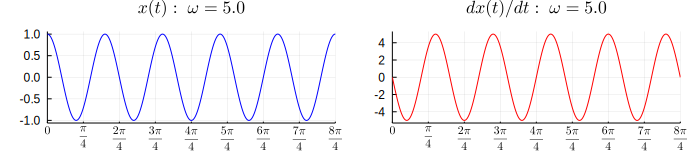

In [9]:
for k in 1:10
    plot_harmonicoscilator(; ω=0.5k, a=1.0, b=0.0, T=2π) |> display
end

### 非斉次Dirichlet境界条件

$\omega > 0$, $T>0$, $\sin\omega T\ne 0$ のとき, 

$$
\ddot x = -\omega^2 x, \quad x(0)=a, \quad x(T)=b
$$

の解は唯一つ存在し, 次のように表わされる:

$$
x(t) = a\cos\omega t + \frac{b-a\cos\omega T}{\sin\omega T}\sin\omega t
$$

In [10]:
### parameters

ω = 4/3
T = 2π
a, b = 1.0, 2.0;

In [11]:
### exact solution

fD(ω, T, a, b, t) = a*cos(ω*t) + (b - a*cos(ω*T))/sin(ω*T)*sin(ω*t)
dfD(ω, T, a, b, t) = -a*ω*sin(ω*t) + (b - a*cos(ω*T))/sin(ω*T)*ω*cos(ω*t)

dfD (generic function with 1 method)

In [12]:
### numerical solution

function bcD!(residual, u, p, t)
    residual[1] = u[1][1]   - p[2]
    residual[2] = u[end][1] - p[3]
end
bvpD = BVProblem(harmonicoscillator!, bcD!, [a,0], (0,T), [ω, a, b])
@time solD = solve(bvpD, GeneralMIRK4(), dt=0.01);

 18.319562 seconds (305.94 M allocations: 23.267 GiB, 18.69% gc time)


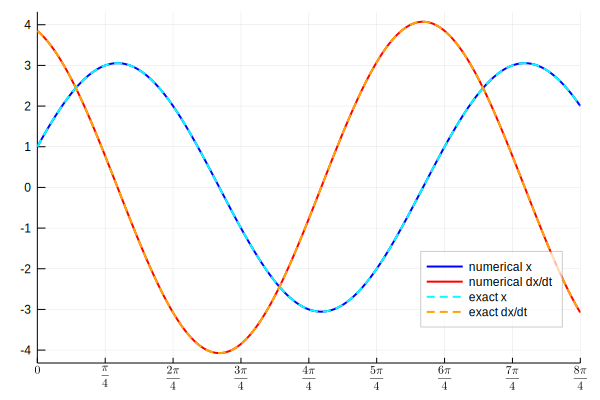

In [13]:
L = round(Int, 8π/T)
kpiL(k) = isone(L) ? "\$$(k)\\pi\$" : "\$\\frac{$(k)\\pi}{$L}\$"
xticks_num = 0:π/L:T
xticks_str = [
    "\$0\$"
    "\$$(kpiL(""))\$"
    ["\$$(kpiL(k))\$" for k in 2:length(xticks_num)-1];
]
xticks = (xticks_num, xticks_str)

plot(legend=:bottomright, xticks=xticks, yticks=-4:1:4)
plot!(solD, vars=(0,1), xlabel=" ", label="numerical x",     lw=2, color=:blue)
plot!(solD, vars=(0,2), xlabel=" ", label="numerical dx/dt", lw=2, color=:red)
ts = range(0, T, length=200)
plot!(ts, fD.(ω, T, a, b, ts),  ls=:dash, lw=2, color=:cyan,   label="exact x")
plot!(ts, dfD.(ω, T, a, b, ts), ls=:dash, lw=2, color=:orange, label="exact dx/dt")

### 非斉次Neumann境界条件

$\omega > 0$, $T>0$, $\sin\omega T\ne 0$ のとき, 

$$
\ddot x = -\omega^2 x, \quad \dot x(0)=a\omega, \quad \dot x(T)=b\omega
$$

の解は唯一つ存在し, 次のように表わされる:

$$
x(t) = \frac{a\cos\omega T-b}{\sin\omega T}\cos\omega t + a\sin\omega t 
$$

In [14]:
### parameters

T = 2π
ω = 4/3
a, b = 1.0/ω, 2.0/ω

(0.75, 1.5)

In [15]:
### exact solution

fN(ω, T, a, b, t) = (a*cos(ω*T)-b)/sin(ω*T)*cos(ω*t) + a*sin(ω*t)
dfN(ω, T, a, b, t) = -(a*cos(ω*T)-b)/sin(ω*T)*ω*sin(ω*t) + a*ω*cos(ω*t)

dfN (generic function with 1 method)

In [16]:
### numerical solution

function bcN!(residual, u, p, t)
    residual[1] = u[1][2]   - p[2]*p[1]
    residual[2] = u[end][2] - p[3]*p[1]
end
bvpN = BVProblem(harmonicoscillator!, bcN!, [0,a], (0,T), [ω,a,b])
@time solN = solve(bvpN, GeneralMIRK4(), dt=0.01);

 17.577171 seconds (305.38 M allocations: 23.238 GiB, 19.10% gc time)


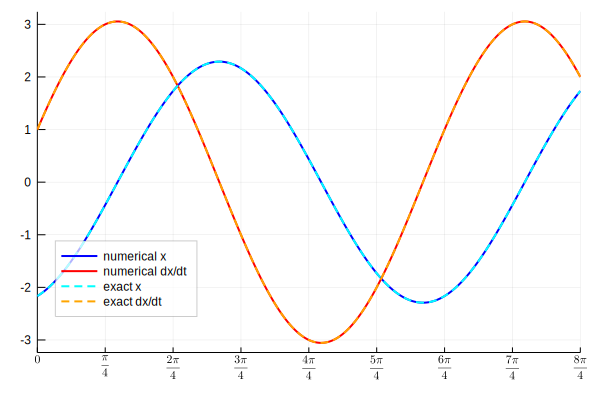

In [66]:
L = round(Int, 8π/T)
kpiL(k) = isone(L) ? "\$$(k)\\pi\$" : "\$\\frac{$(k)\\pi}{$L}\$"
xticks_num = 0:π/L:T
xticks_str = [
    "\$0\$"
    "\$$(kpiL(""))\$"
    ["\$$(kpiL(k))\$" for k in 2:length(xticks_num)-1];
]
xticks = (xticks_num, xticks_str)

plot(legend=:bottomleft, xticks=xticks, yticks=-4:1:4)
plot!(solN, vars=(0,1), xlabel=" ", label="numerical x",     lw=2, color=:blue)
plot!(solN, vars=(0,2), xlabel=" ", label="numerical dx/dt", lw=2, color=:red)
ts = range(0, T, length=200)
plot!(ts, fN.(ω, T, a, b, ts),  ls=:dash, lw=2, color=:cyan,   label="exact x")
plot!(ts, dfN.(ω, T, a, b, ts), ls=:dash, lw=2, color=:orange, label="exact dx/dt")